# 1. Importing Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Data set : Titanic Dataset

In [32]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/titanic-dataset


In [33]:
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
print(df.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## Exploring our dataset

In [34]:
## Shape of the Dataset
print(f'Shape of dataset: {df.shape}')

#So we have 891 Columns and 12 rows

Shape of dataset: (891, 12)


### Data Types and Null values

In [35]:
# printing column names in our dataset
column = [column_name for column_name, _ in df.items()]
print(f'Column names: {column}')

# Summary of data types and null counts
summary = pd.DataFrame({
    'Data Type': df.dtypes,
    'Null Values': df.isnull().sum()
})
print(summary)


Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
            Data Type  Null Values
PassengerId     int64            0
Survived        int64            0
Pclass          int64            0
Name           object            0
Sex            object            0
Age           float64          177
SibSp           int64            0
Parch           int64            0
Ticket         object            0
Fare          float64            0
Cabin          object          687
Embarked       object            2


We can see that `Age`, `cabin` and `Embarked` have missing values.

In [36]:
### Checking the Skewness to use mean or median for the missing values

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Calculate skewness
skewness = numerical_cols.skew()

print("Skewness of numerical columns:")
print(skewness)


Skewness of numerical columns:
PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64


In [37]:
# 1. Handle numerical columns

# mean if not that much skewed. median if skewed
df['Age'] = df['Age'].fillna(df['Age'].mean()) 


# 2. Handle categorical columns
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Using mode (most frequent)

# 3. Handle 'Cabin' : Highest missing values , we can drop the columns too

df['Cabin'] = df['Cabin'].fillna('Unknown')


In [38]:
# 4. Check again
print("\nMissing values after handling:")
print(df.isnull().sum())
print(df.head(5))


Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  
0      0       

#### as we can see above tha we dont have any `N/A` vakue lets go further and explore more 

## Droping some features:
* Because these will not be useful for classification

In [39]:
# Drop 'Name', 'Ticket', and 'Cabin' columns
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
print(df.head(5))
print(df['Embarked'].unique())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S
['S' 'C' 'Q']


## Encoding
* we will do the label Encoding:
  * Because `Sex` and `Embarked ` both have only two values

In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['Sex', 'Embarked']:
  df[col] = le.fit_transform(df[col])


In [43]:
print(df.head(5))
# Lets see the summary now
summary = pd.DataFrame({
    'Data Type': df.dtypes,
    'Null Values': df.isnull().sum()
})
print(summary)

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2
            Data Type  Null Values
PassengerId     int64            0
Survived        int64            0
Pclass          int64            0
Sex             int64            0
Age           float64            0
SibSp           int64            0
Parch           int64            0
Fare          float64            0
Embarked        int64            0


From Above we can see that all our data is now numerical based.

In [45]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df.head(7))


   PassengerId  Survived    Pclass       Sex       Age     SibSp     Parch  \
0    -1.730108 -0.789272  0.827377  0.737695 -0.592481  0.432793 -0.473674   
1    -1.726220  1.266990 -1.566107 -1.355574  0.638789  0.432793 -0.473674   
2    -1.722332  1.266990  0.827377 -1.355574 -0.284663 -0.474545 -0.473674   
3    -1.718444  1.266990 -1.566107 -1.355574  0.407926  0.432793 -0.473674   
4    -1.714556 -0.789272  0.827377  0.737695  0.407926 -0.474545 -0.473674   
5    -1.710669 -0.789272  0.827377  0.737695  0.000000 -0.474545 -0.473674   
6    -1.706781 -0.789272 -1.566107  0.737695  1.870059 -0.474545 -0.473674   

       Fare  Embarked  
0 -0.502445  0.585954  
1  0.786845 -1.942303  
2 -0.488854  0.585954  
3  0.420730  0.585954  
4 -0.486337  0.585954  
5 -0.478116 -0.678175  
6  0.395814  0.585954  


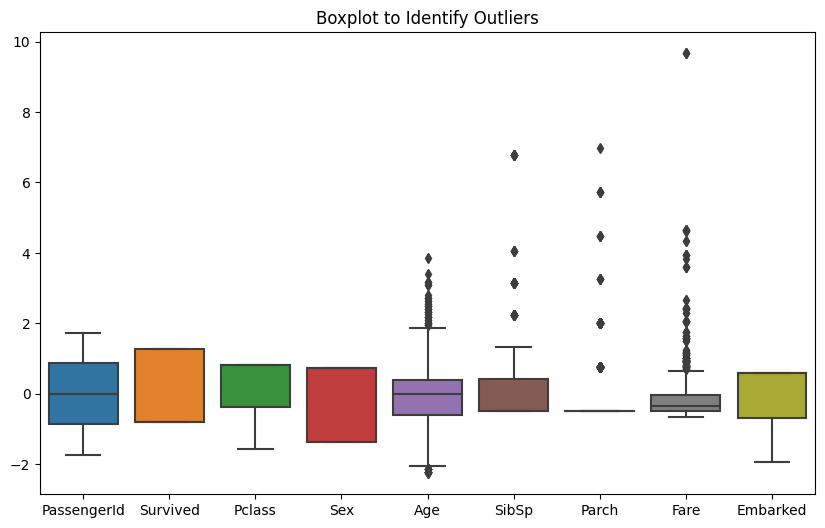

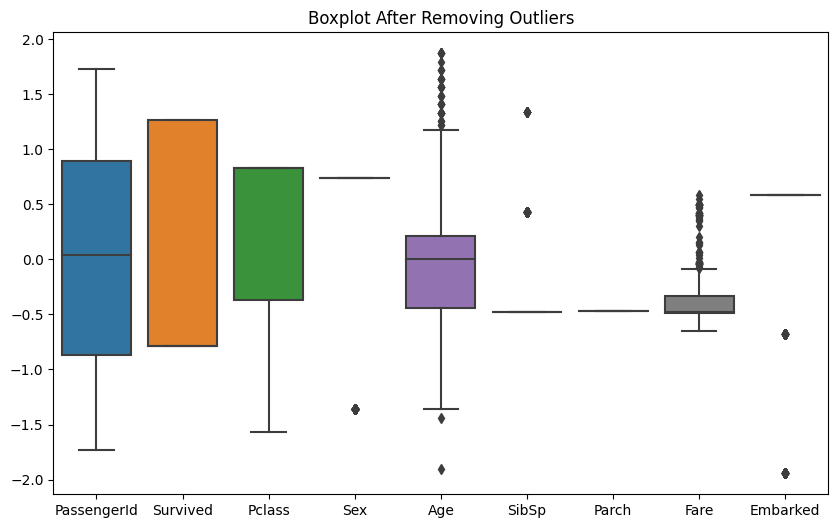

In [47]:




# Sample DataFrame (replace with your dataset)
# df = pd.read_csv("your_data.csv")

# Create a larger figure
plt.figure(figsize=(10, 6))  # Adjusting the figure size

# Visualizing the boxplot
sns.boxplot(data=df)  # Replace 'df' with the column you're interested in
plt.title('Boxplot to Identify Outliers')
plt.show()

# Calculate Q1, Q3, and IQR for outlier removal
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df >= lower_bound) & (df <= upper_bound)].dropna()

# Create a larger figure again
plt.figure(figsize=(10, 6))  # Adjusting the figure size

# Visualizing the cleaned data
sns.boxplot(data=df_cleaned)  # This will show the data without outliers
plt.title('Boxplot After Removing Outliers')
plt.show()


In [48]:
print(df.head(5))

   PassengerId  Survived    Pclass       Sex       Age     SibSp     Parch  \
0    -1.730108 -0.789272  0.827377  0.737695 -0.592481  0.432793 -0.473674   
1    -1.726220  1.266990 -1.566107 -1.355574  0.638789  0.432793 -0.473674   
2    -1.722332  1.266990  0.827377 -1.355574 -0.284663 -0.474545 -0.473674   
3    -1.718444  1.266990 -1.566107 -1.355574  0.407926  0.432793 -0.473674   
4    -1.714556 -0.789272  0.827377  0.737695  0.407926 -0.474545 -0.473674   

       Fare  Embarked  
0 -0.502445  0.585954  
1  0.786845 -1.942303  
2 -0.488854  0.585954  
3  0.420730  0.585954  
4 -0.486337  0.585954  


## Corelation Heat map for visualizing the correlation between the features

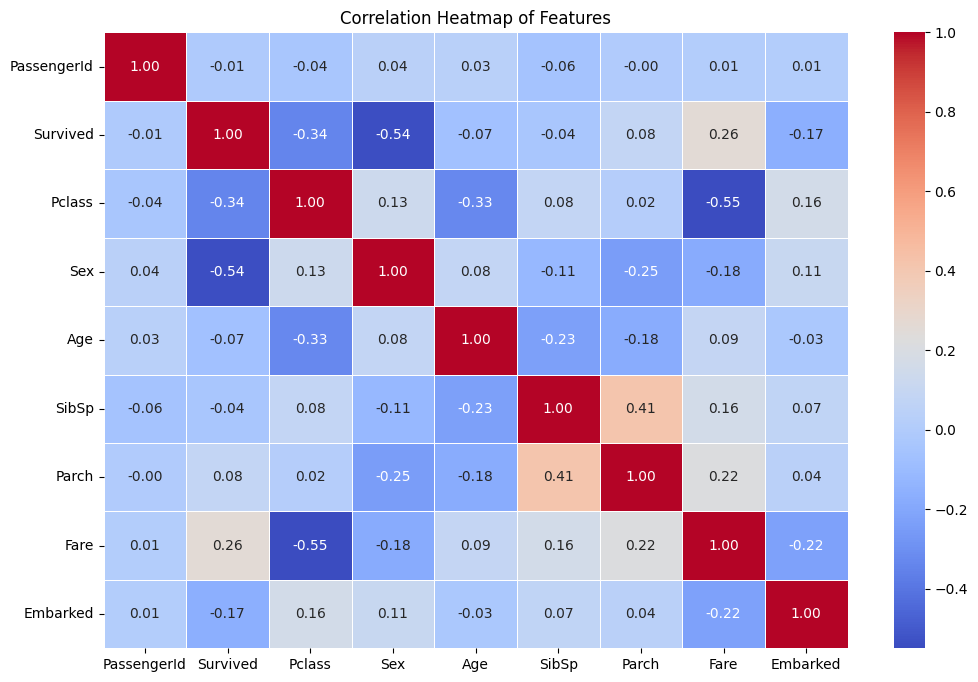

In [52]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a larger figure for better clarity
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adding title to the plot
plt.title('Correlation Heatmap of Features')

# Display the plot
plt.show()


We can see from the plot that two features are some correated :
1. `pclass` and`Fare`
2. `survived` and `sex`